In [6]:
import numpy as np
import pandas as pd
import polars as pl
import pytomlpp as toml
from data_preprocessing import getXY, data_normalizeation
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import roc_curve, auc, accuracy_score, recall_score
from sklearn.model_selection import train_test_split

In [7]:
cfg = toml.load('/home/gyli/GP_HP/cfg/feature_selection.toml')
data_path = cfg['data_path']
variance_filter_thres = cfg['variance_filter_thres']
raw_x, raw_y = getXY(data_path)
# raw_x = data_normalizeation(raw_x)
future_names = raw_x.columns
pd_x, pd_y = raw_x.to_pandas(), raw_y.to_pandas()
svm_clf = SVC()
X, Y = raw_x.to_pandas(), np.ravel(raw_y.to_pandas())

In [8]:
mb = ['白蛋白', '活化部分凝血活酶时间', '低密度脂蛋白', '钠', '中性粒细胞数', '甘油三酯', '凝血酶原时间']
t_x = X[mb]

Accuracy: 0.7959211055950624
Recall: 0.7853658536585366


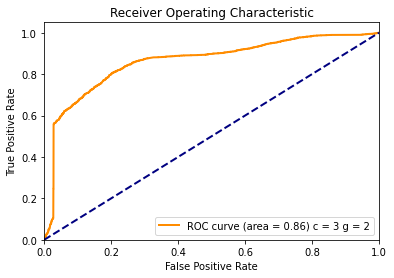

<Figure size 432x288 with 0 Axes>

In [9]:
params = [(3,2)]
X_train, X_test, y_train, y_test = train_test_split(t_x, Y, test_size=0.3)
for c, g in params:
    svm_model = SVC(kernel='rbf', gamma=g, C=c, probability=True)
    svm_model.fit(X_train, y_train)
    y_score = svm_model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # 计算准确率和召回率
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Recall:", recall)

    # 绘制 ROC 曲线
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc + f' c = {c} g = {g}')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    plt.savefig(f'ROC_c_{c}_g_{g}.jpg')

Precision: 0.7965919763853482
Recall: 0.8019512195121952


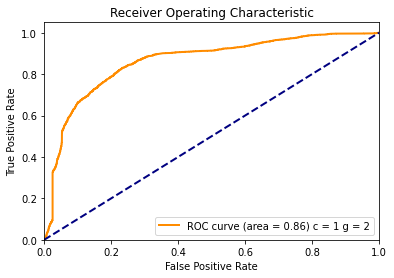

Precision: 0.7973970213336912
Recall: 0.7848780487804878


<Figure size 432x288 with 0 Axes>

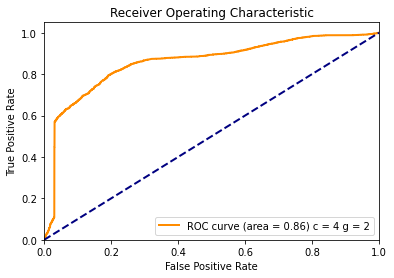

Precision: 0.7858580437407755
Recall: 0.7102439024390244


<Figure size 432x288 with 0 Axes>

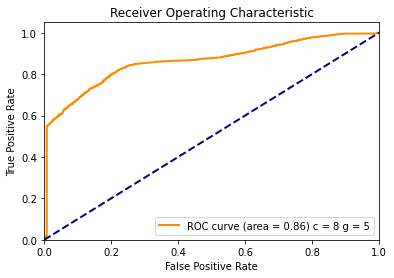

Precision: 0.7901516167986046
Recall: 0.7304878048780488


<Figure size 432x288 with 0 Axes>

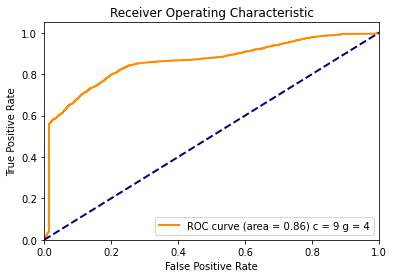

<Figure size 432x288 with 0 Axes>

In [11]:
params = [(1,2), (4,2), (8,5), (9,4)]
for c, g in params:
    svm_model = SVC(kernel='rbf', gamma=g, C=c, probability=True)
    svm_model.fit(X_train, y_train)
    y_score = svm_model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # 计算准确率和召回率
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print("Precision:", accuracy)
    print("Recall:", recall)

    # 绘制 ROC 曲线
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc + f' c = {c} g = {g}')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    plt.savefig(f'ROC_c_{c}_g_{g}.jpg')